In [1]:
import torch
import numpy as np
import skrf as rf
import rf_ckt_optimizer


In [2]:
freq = torch.tensor(np.arange(100e6, 2000e6, 1e6),dtype=torch.float32)
rfopt = rf_ckt_optimizer.RFCircuitOptimizer(freq)

In [3]:
cap = torch.tensor(1e-12, dtype=torch.float32, requires_grad=True)
s_mat_cap = rfopt.capacitor(cap)
cap

tensor(1.0000e-12, requires_grad=True)

In [4]:
cap2 = torch.tensor(2e-12, dtype=torch.float32, requires_grad=True)
s_mat_cap2 = rfopt.capacitor(cap2)
s_mat_cap2 = s_mat_cap2.detach()
cap2

tensor(2.0000e-12, requires_grad=True)

In [5]:
optimizer = torch.optim.Adam([cap], lr=5e-14)
loss_fn = rf_ckt_optimizer.MSELoss()
loss = loss_fn(s_mat_cap, s_mat_cap2)
loss

tensor(0.2828, grad_fn=<MeanBackward0>)

In [6]:
for i in range(1000):
    optimizer.zero_grad()
    s_mat_cap = rfopt.capacitor(cap)
    loss = loss_fn(s_mat_cap, s_mat_cap2)
    loss.backward()
    optimizer.step()
    if((i+1)%100 == 0):
        print(f"Iteration {i+1}: Loss: {loss.item()}, cap: {cap.item()}")

Iteration 100: Loss: 0.0003581386408768594, cap: 1.9993169446397285e-12
Iteration 200: Loss: 0.0014406645204871893, cap: 1.996079950633556e-12
Iteration 300: Loss: 7.955304317874834e-05, cap: 1.9940889217640034e-12
Iteration 400: Loss: 0.00027197712915949523, cap: 1.9969169547107146e-12
Iteration 500: Loss: 0.001093370607122779, cap: 1.992543283146908e-12
Iteration 600: Loss: 0.00023515797511208802, cap: 1.999513402073383e-12
Iteration 700: Loss: 0.0013013972202315927, cap: 1.9962365094272627e-12
Iteration 800: Loss: 0.0002909317845478654, cap: 2.0006769678448943e-12
Iteration 900: Loss: 0.00042311279685236514, cap: 2.001376061405713e-12
Iteration 1000: Loss: 0.0023604060988873243, cap: 1.9946991107466783e-12


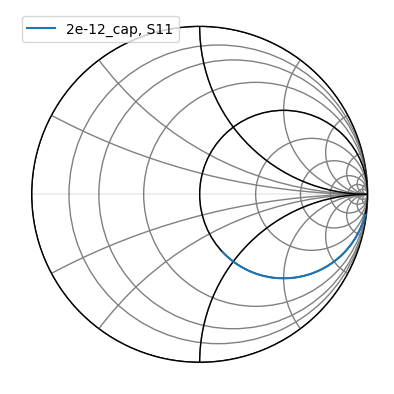

In [7]:
ntwk = rf.Network(frequency=freq.detach().numpy(), s=s_mat_cap.detach().numpy()
                  , name='2e-12_cap')
ntwk.s11.plot_s_smith()


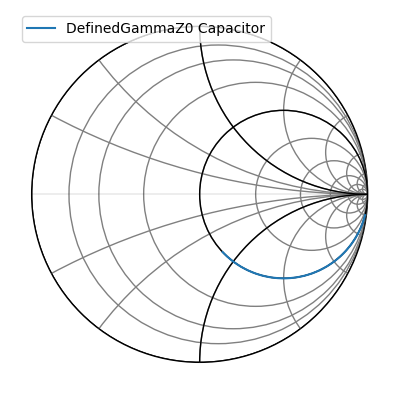

In [8]:
media = rf.media.DefinedGammaZ0(frequency=rf.Frequency.from_f(freq.detach().numpy()))
cap_ntwk = media.capacitor(2e-12)
cap_ntwk.s11.plot_s_smith(label='DefinedGammaZ0 Capacitor')

In [9]:
ind = torch.tensor(1e-9, dtype=torch.float32, requires_grad=True)
s_mat_ind = rfopt.inductor(ind)
ind2 = torch.tensor(2e-9, dtype=torch.float32, requires_grad=True)
s_mat_ind2 = rfopt.inductor(ind2)
s_mat_ind2 = s_mat_ind2.detach()
ind_optimizer = torch.optim.Adam([ind], lr=1e-11)


In [10]:
for i in range(1000):
    ind_optimizer.zero_grad()
    s_mat_ind = rfopt.inductor(ind)
    loss = loss_fn(s_mat_ind, s_mat_ind2)
    loss.backward()
    ind_optimizer.step()
    if((i+1)%100 == 0):
        print(f"Iteration {i+1}: Loss: {loss.item()}, ind: {ind.item()}")

Iteration 100: Loss: 0.0008232640102505684, ind: 1.997041421120116e-09
Iteration 200: Loss: 0.0002602215390652418, ind: 2.004401311594961e-09
Iteration 300: Loss: 8.030156459426507e-05, ind: 1.9996138078681724e-09
Iteration 400: Loss: 1.801643884391524e-05, ind: 1.9985006982636833e-09
Iteration 500: Loss: 0.00010332583769923076, ind: 2.000209997632396e-09
Iteration 600: Loss: 7.37967638997361e-05, ind: 2.0017913993086722e-09
Iteration 700: Loss: 0.00019384514598641545, ind: 1.998024190541514e-09
Iteration 800: Loss: 1.6525636965525337e-05, ind: 2.0005195278116616e-09
Iteration 900: Loss: 0.00026893752510659397, ind: 2.0045385351608047e-09
Iteration 1000: Loss: 7.605646533193067e-05, ind: 1.9996819755618844e-09


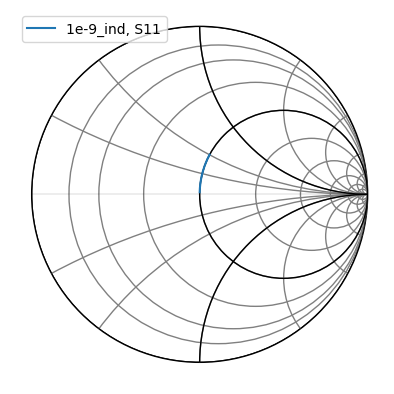

In [11]:
ind_ntwk = rf.Network(frequency=freq.detach().numpy(), s=s_mat_ind.detach().numpy()
                  , name='1e-9_ind')
ind_ntwk.s11.plot_s_smith()

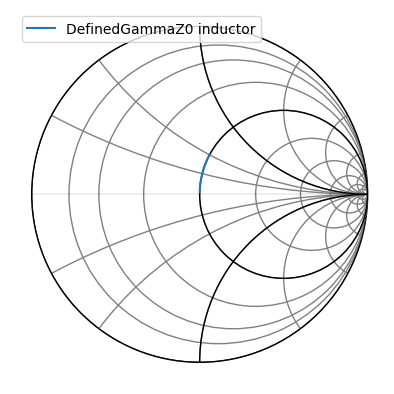

In [12]:
ind_ntwk = media.inductor(2e-9)
ind_ntwk.s11.plot_s_smith(label='DefinedGammaZ0 inductor')

In [13]:
res = torch.tensor(50.0, dtype=torch.float32, requires_grad=True)
s_mat_res = rfopt.resistor(res)
res2 = torch.tensor(100, dtype=torch.float32, requires_grad=True)
s_mat_res2 = rfopt.resistor(res2).detach()
res_optimizer = torch.optim.Adam([res], lr=0.1)

In [14]:
for i in range(1000):
    res_optimizer.zero_grad()
    s_mat_res = rfopt.resistor(res)
    loss = loss_fn(s_mat_res, s_mat_res2)
    loss.backward()
    res_optimizer.step()
    if((i+1)%100 == 0):
        print(f"Iteration {i+1}: Loss: {loss.item()}, res: {res.item()}")

Iteration 100: Loss: 0.12621785700321198, res: 59.78388214111328
Iteration 200: Loss: 0.09194262325763702, res: 69.02528381347656
Iteration 300: Loss: 0.06267266720533371, res: 77.80906677246094
Iteration 400: Loss: 0.03725641220808029, res: 86.21324157714844
Iteration 500: Loss: 0.014884418807923794, res: 94.29777526855469
Iteration 600: Loss: 0.00013433396816253662, res: 100.06718444824219
Iteration 700: Loss: 6.854534149169922e-06, res: 100.00592041015625
Iteration 800: Loss: 3.013014793395996e-05, res: 99.98441314697266
Iteration 900: Loss: 1.5482306480407715e-05, res: 100.00080108642578
Iteration 1000: Loss: 2.5384128093719482e-05, res: 100.00355529785156


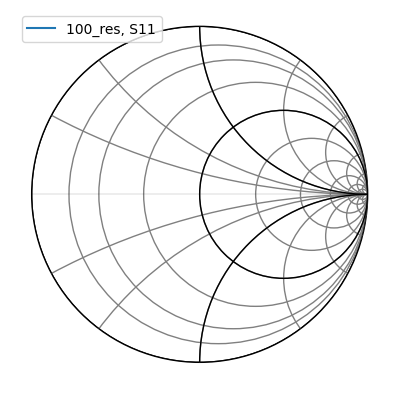

In [15]:
res_ntwk = rf.Network(frequency=freq.detach().numpy(),
                      s=s_mat_res.detach().numpy(), name='100_res')
res_ntwk.s11.plot_s_smith()

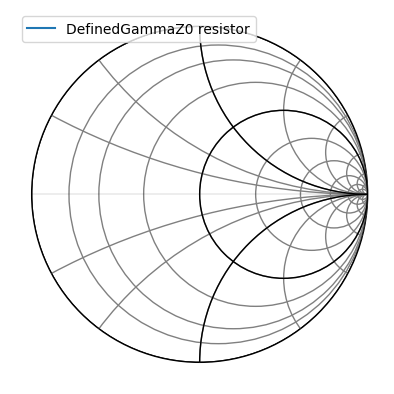

In [16]:
res_ntwk = media.resistor(100)
res_ntwk.s11.plot_s_smith(label='DefinedGammaZ0 resistor')